# Markov Discrete Problems

## Markov Chains

A worker’s employment dynamics obey the stochastic matrix

$$P = \begin{bmatrix}
1-\alpha & \alpha \\
\beta & 1-\beta
\end{bmatrix}$$

with $\alpha\in(0,1)$ and $\beta\in (0,1)$. First line corresponds to employment, second line to unemployment.

__Which is the stationary equilibrium?__

In [14]:
α = β = 0.1
P = [1-α α;
    β  1-β]
println(P)

[0.9 0.1; 0.1 0.9]


__In the long run, what will the the fraction $p$ of time spent unemployed? (Denote by $X_m$ the fraction of dates were one is unemployed)__

__Illustrate this convergence by generating a simulated series of length 10000 starting at $X_0=1$. Plot $X_m-p$ against $m$. (Take $\alpha=\beta=0.1$).__

In [24]:
using Plots

In [48]:
function next_step(x, α, β)
    r = rand()
    if (r > 1-α || r > β) && (x == 1)
        return 2
    else
        return 1
    end
end
    
function sim(;n = 2, α = 0.1, β = 0.1, x_0=1)
    states = [x_0]
    out = []
    for i=1:n
        push!(states, next_step(states[i], α, β))
        push!(out, sum(states) / i+1)
        println(states, out)
        # print(states, out)
    end
    return out
end



sim (generic function with 1 method)

__Repeat with $X_0=2$__

[1, 2]Any[4.0]
[1, 2, 1]Any[4.0, 3.0]
[2, 1]Any[4.0]
[2, 1, 2]Any[4.0, 3.5]


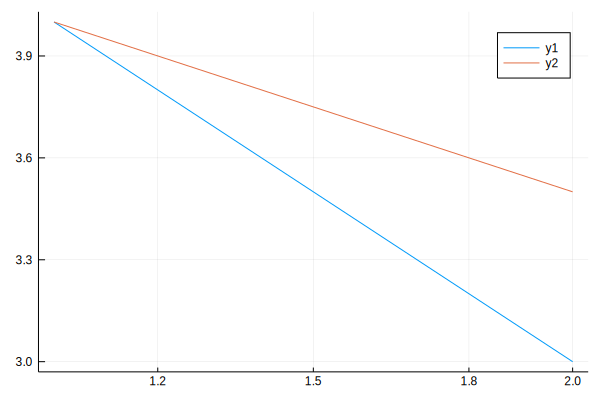

In [49]:
pl = plot(sim(x_0 = 1))
plot!(pl, sim(x_0 = 2))

## Mine management (from Compecon)

A mine operator must decide how much ore to extract from a mine that will be shut down after $T$ years of operation.

The price of extracted ore is $p$ dollars per ton in any year, and the total cost of extaction given that the mine contains $s$ tons at the beginning of the year is $c(s,x)$ dollars. 

The mine currently contains $s_0$ tons of ore. Assuming the amount of ore extracted in any year must be an integer number of tons, what extraction schedule maximizes profits? 

Calibration: $p=1$, initial stock $\overline{s}=100$, cost of extraction $c(s,x)=\frac{x^2}{1+s}$ and annual discount factor $\delta=0.9$.

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__

In [45]:
p = 1; s = 100; c(s, x) = x^2 / (1+s);

__Solve the problem with the more adequate method__

## Asset replacement (from Compecon)

At the beginning of each year, a manufacturer must decide whether to continue to operate an aging physical asset or replace it with a new one.

An asset that is $a$ years old yields a profit contribution $p(a)$ up to $n$ years, at which point, the asset becomes unsafe and must be replaced by law.

The cost of a new asset is $c$. What replacement policy maximizes profits?

Calibration: profit $p(a)=50-2.5a-2.5a^2$. Maximum asset age: 5 years. Asset replacement cost: 75, annual discount factor $\delta=0.9$.

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__

__Solve the problem using Value Function Iteration__

__Solve the problem using Policy Iteration. Compare with VFI.__

## Water management (Compecon)

Water from a reservoir can be used for either irrigation or recreation. Irrigatoin during the spring benefits farmers but reduces the reservoir level during the summer, damaging the interests of recreational users.

Specifically, if the reservoir contains $s$ units of water at the beginning of the year and $x$ units are released for irrigation, farmer and recreational user benefits during the year will be $F(x)$ and $U(s-x)$, respectively.

Reservoir levels are replenished by random rainfall during the winter. Specifically, it rains $k$ units with probability $p_k$ for$k=0,1,2, ...K$. The reservoir can hold only $M$ units of water, and excess rainfall flows out without benefit to either farmer or recreational user. 

What irrigation policy maximizes the sum of farmer and recreational user benfefits over an infinite time horizon?

Calibration: $F(x)=\alpha_1 x^{\beta_1}$, $G(x)=\alpha_2 (s-x)^{\beta_2}$ where $\alpha_1=14$, $\beta_1=0.8$, $\alpha_2=10$ and $\beta_2=0.4$. Reservoir capacity: $M=30$ and discount factor $\delta=0.9$. Probabilities that it rains 0,1,2,3,4 units: 0.1, 0.2, 0.4, 0.2 and 0.1.

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__


__Solve the problem__

### Brock-Mirman Stochastic Growth model

This is a neoclassical growth model with unpredictable shocks on productivity.

Social planner tries to solve:

$$\max E_t \left[ \sum_n \beta^n \log C_{t+n} \right]$$

s.t.

$$K_{t+1} = Y_t - C_t$$
$$Y_{t+1} = A_{t+1}K_{t+1}^\alpha$$

where A_t is the level of productivity in period $t$. 
It takes value $A^h=1.05$ with
probability $\pi_h$ and value $A^l=0.95$ with probability $\pi_l$.

__What are the states? What are the controls? Is it possible to bound them in a natural way? Propose a discretization scheme.__

__Solve the model using one of the DMDP techniques__.